In [1]:
import sys
import math as m
import numpy as np
from astropy.io import fits
from astropy.table import Table
from astropy.wcs import WCS
from astropy import units as u
from astropy.coordinates import SkyCoord
import matplotlib.pyplot as plt
#Import GAIA data as lists of RA and DEC

txt = open("GAIAdata.csv")

counter = 0
gaia_ra = []
gaia_dec = []
for line in txt :
    elements = line.split(";")
    if counter != 0 :
        ra = elements[1]
        ra = float(ra)
        gaia_ra.append(ra)
        dec = elements[3]
        dec = float(dec)
        gaia_dec.append(dec)
    counter =+ 1 
    
print (len(gaia_ra))
print (len(gaia_dec))

#Import x,y pixel positions of detected sources

file = fits.open("Aaxy.fits")
data = file[1].data
 
x_list = []
y_list = []
for line in data:
    valuex = line[0]
    valuex = float(valuex)
    valuey = line[1]
    valuey = float(valuey)
    x_list.append(valuex)
    y_list.append(valuey)
    
print (len(x_list))
print (len(y_list))

#Convert pixel coordinates to world coordinates

x_world = []
y_world = []
w = WCS("Anew-image.fits")
for a in range(len(x_list)):
    x = x_list[a]
    y = y_list[a]
    lon, lat = w.all_pix2world(x, y, 0) #0 or 1 here? IMPORTANT!
    lon = float(lon)
    lat = float(lat)
    x_world.append(lon)
    y_world.append(lat)
    
print (len(x_world))
print (len(y_world))
    
#Great Circle Distance - separation function from Astropy - TEST 

c1 = SkyCoord(gaia_ra[0], gaia_dec[0], frame='icrs', unit = 'deg')
c2 = SkyCoord(x_world[0], y_world[0], frame='icrs', unit = 'deg')
sep = c1.separation(c2)
print (sep.deg)

#A loop that selects the counterpart based on the smallest distance and calculates errors 
#in DEC and RA
results  = []
raerror = []
decerror = []
for a in range(10):
    xsource = x_world[a]
    ysource = y_world[a]
    temp = []
    for b in range(len(gaia_ra)):
        xgaia = gaia_ra[b]
        ygaia = gaia_dec[b]
        c1 = SkyCoord(xgaia, ygaia, frame='icrs', unit = 'deg')
        c2 = SkyCoord(xsource, ysource, frame='icrs', unit = 'deg')
        sep = c1.separation(c2)
        sep = sep.deg
        temp.append(sep)
    match = min(temp)
    print (match)
    index_number = temp.index(match)
    results.append(index_number)
    ra_err = gaia_ra[index_number] - x_world[a]
    dec_err = gaia_dec[index_number] - y_world[a]
    raerror.append(ra_err)
    decerror.append(dec_err)

print (results)
print (raerror)
print (decerror)

plt.plot(raerror, decerror, 'ro')
plt.axis([ -0.001, 0.001, -0.001, 0.001])
plt.ylabel("Error in Dec (degrees)")
plt.xlabel("Error in RA (degrees)")
plt.show()

2986
2986
789
789
789
789
0.07074419054223217
0.00025106784688042224
0.00021391079432788593
0.0003204303071334972
0.00011694094942765205
0.0003318070620261219
0.00020796490635373928
0.0002882569148988786
0.00038186282288522975
0.0006813710111786576
0.00019980380135994113
[5, 3, 1, 8, 16, 18, 25, 34, 2403, 10]
[0.000328942451005787, 0.00016403955459054487, 0.00018288663869725497, 9.495253380009672e-06, -5.470819127140203e-05, 1.6322026283432933e-05, 0.00022133523322054316, -1.8806487162237318e-05, -0.00044489144175940964, 0.00014160808831320537]
[6.243610769729457e-06, -0.00017353177641865614, -0.00028847566630219035, -0.00011671691267878259, -0.00032917175126812026, -0.00020759179094653746, -0.0002337034872752497, -0.000381593907853528, 0.0005910587647051102, -0.00016811935393690192]


<Figure size 640x480 with 1 Axes>

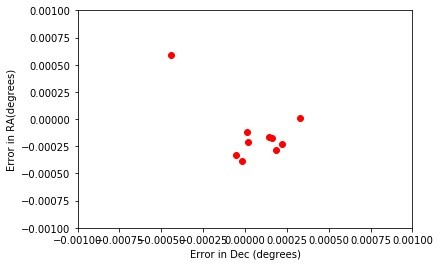

In [9]:
plt.plot(raerror, decerror, 'ro')
plt.axis([ -0.001, 0.001, -0.001, 0.001])
plt.xlabel("Error in Dec (degrees)")
plt.ylabel("Error in RA(degrees)")
plt.show()